In [1]:
from sampstrats import GaussianPRM
import random
import math
import copy
import heapq
import numpy as np
import networkx as nx
import IPPRMBase
import matplotlib.pyplot as plt
from IPPerfMonitor import IPPerfMonitor
import IPTestSuite

In [2]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                )
    
   
    

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000', ax = ax)

Planning:  Entrances
Failed 'CollisionChecker' object is not subscriptable
Planning:  KIT
Failed 'CollisionChecker' object is not subscriptable
Planning:  Inside
Failed 'CollisionChecker' object is not subscriptable
Planning:  SSL
Failed 'CollisionChecker' object is not subscriptable
Planning:  Ring
Failed 'CollisionChecker' object is not subscriptable
Planning:  Hemispheres
Failed 'CollisionChecker' object is not subscriptable
Planning:  Hammerhead
Failed 'CollisionChecker' object is not subscriptable
Planning:  Zigzag
Failed 'CollisionChecker' object is not subscriptable
Planning:  Spiral
Failed 'CollisionChecker' object is not subscriptable
Planning:  medium
Failed 'CollisionChecker' object is not subscriptable
Planning:  medium2
Failed 'CollisionChecker' object is not subscriptable
Planning:  L-square
Failed 'CollisionChecker' object is not subscriptable
Planning:  Teeth
Failed 'CollisionChecker' object is not subscriptable
Planning:  Gearshift
Failed 'CollisionChecker' object is n

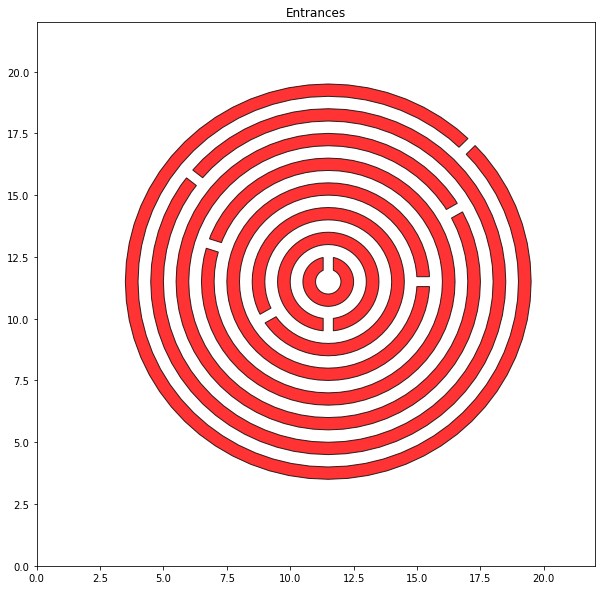

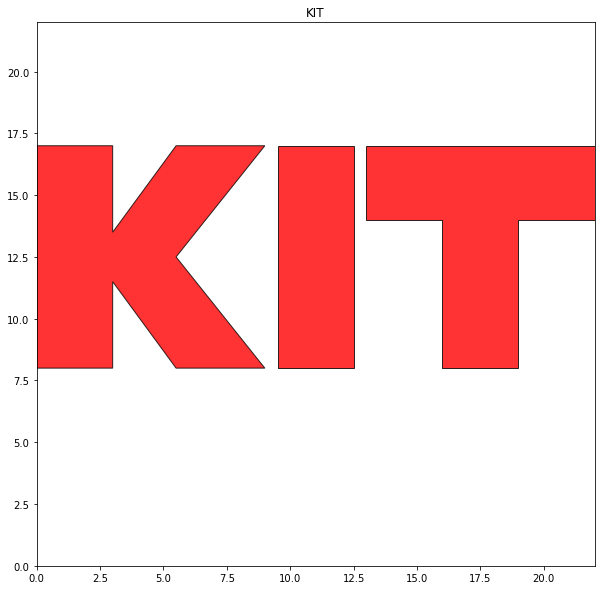

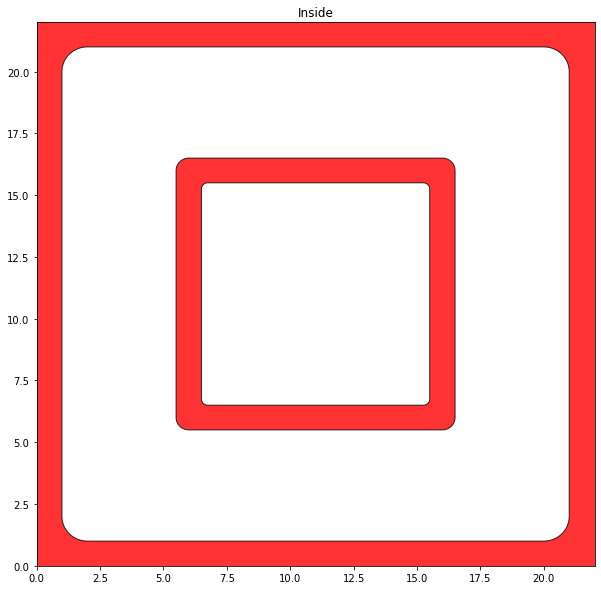

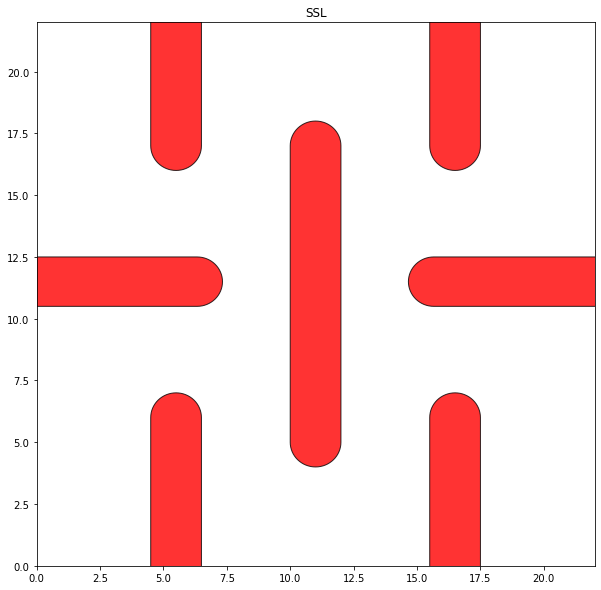

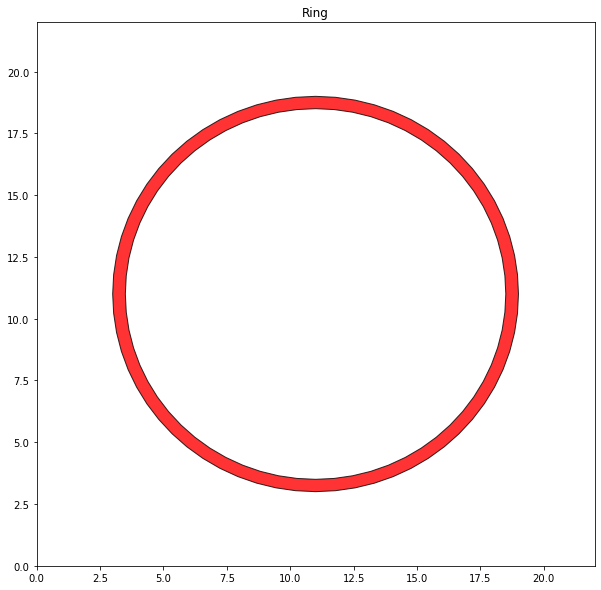

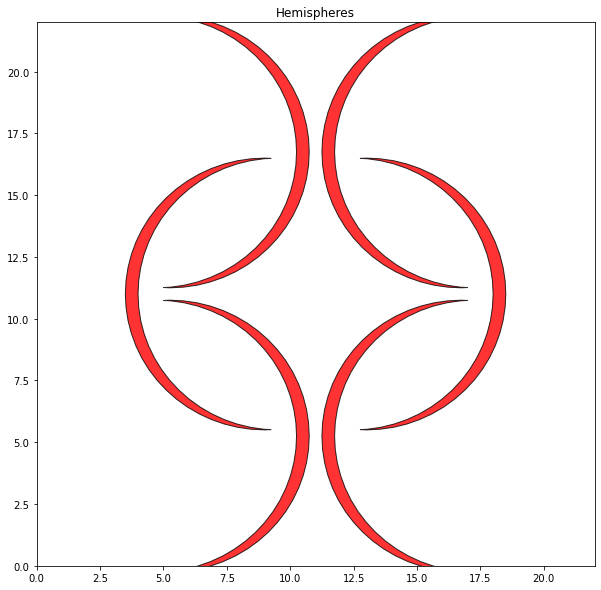

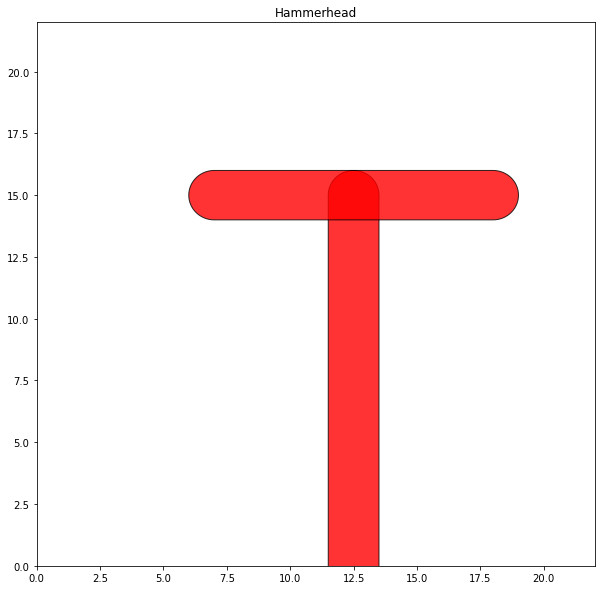

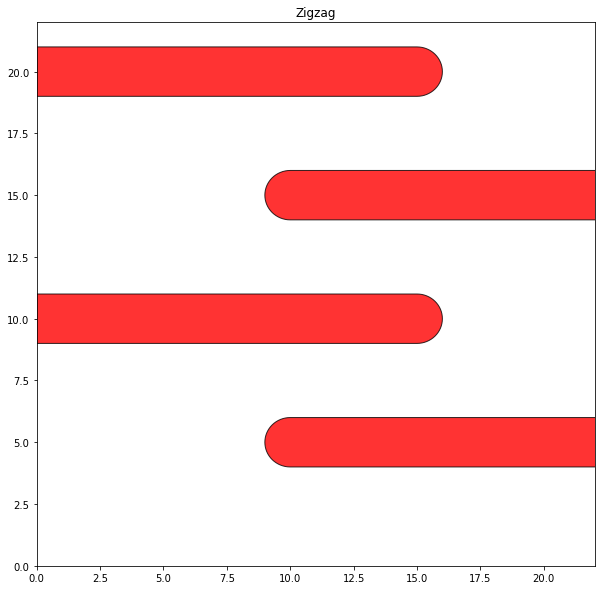

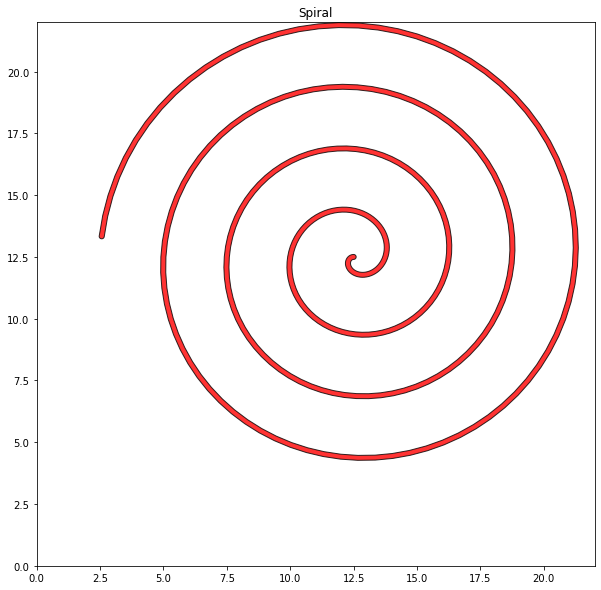

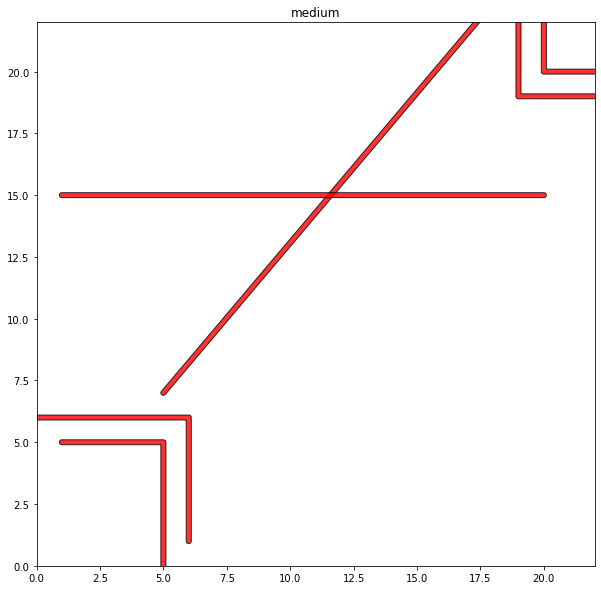

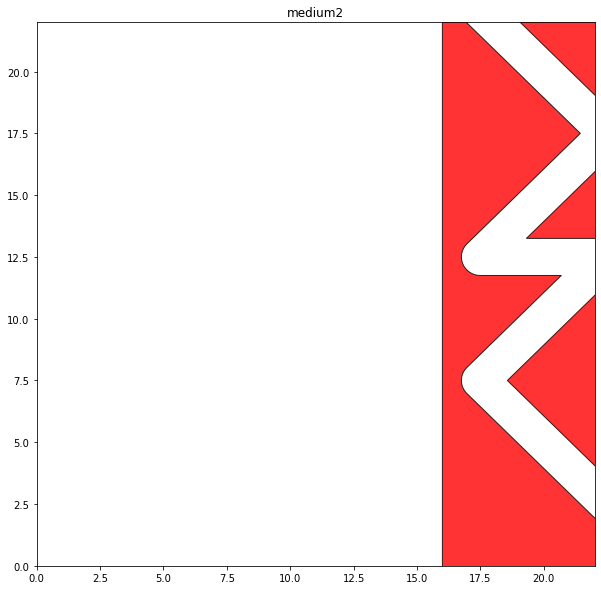

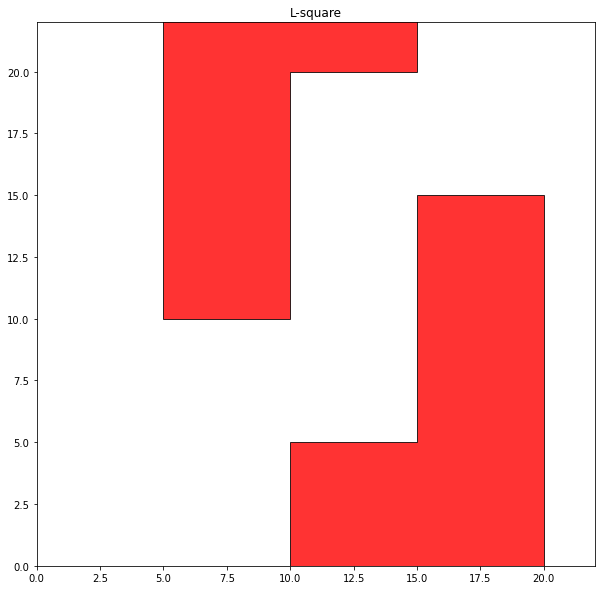

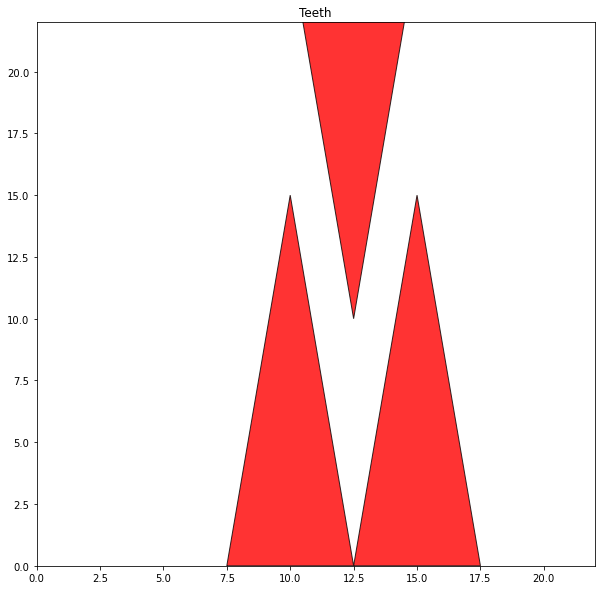

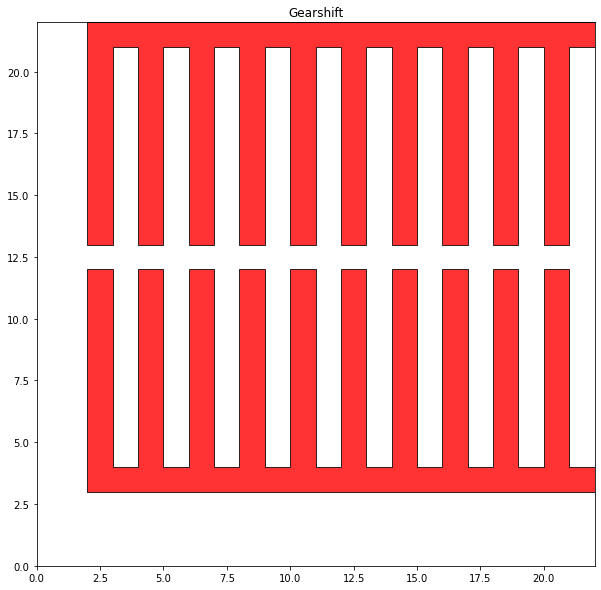

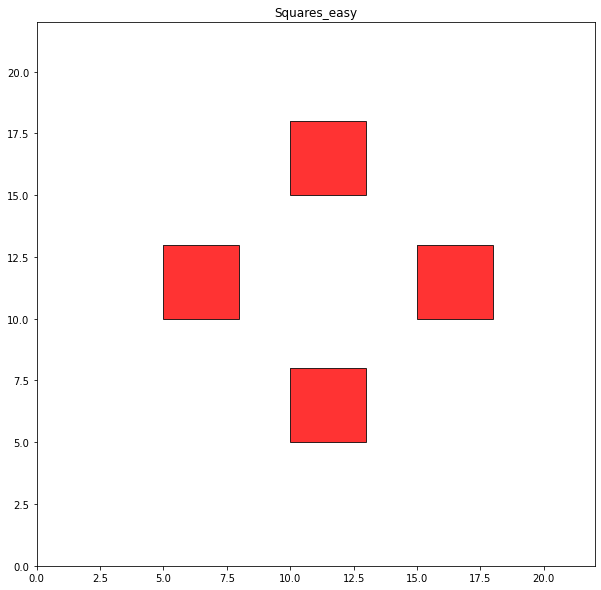

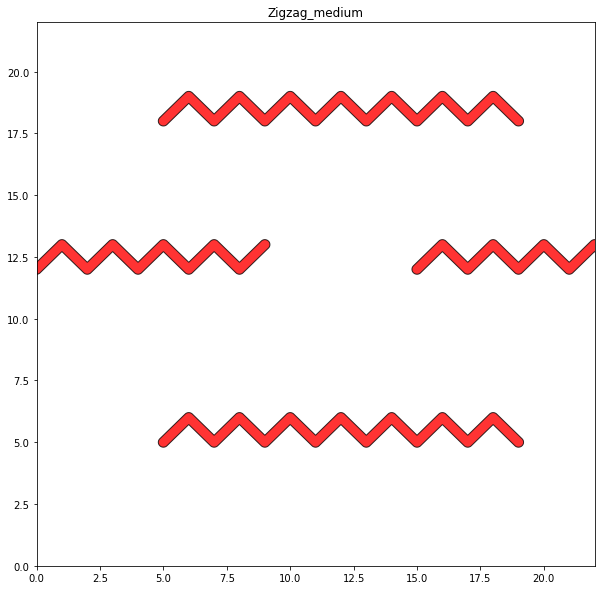

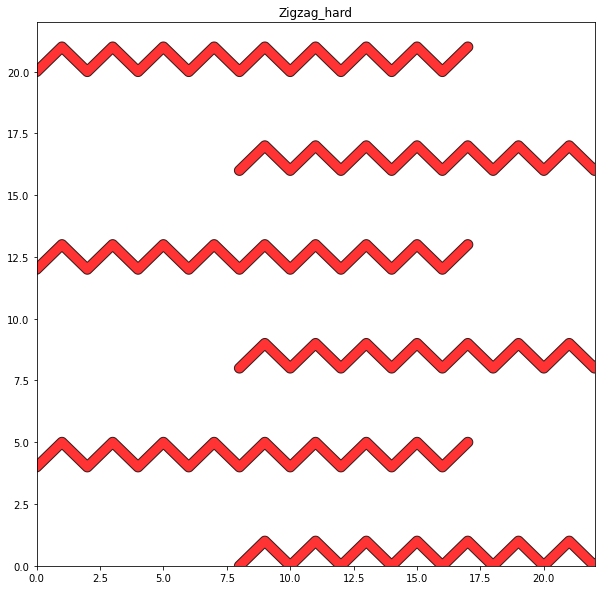

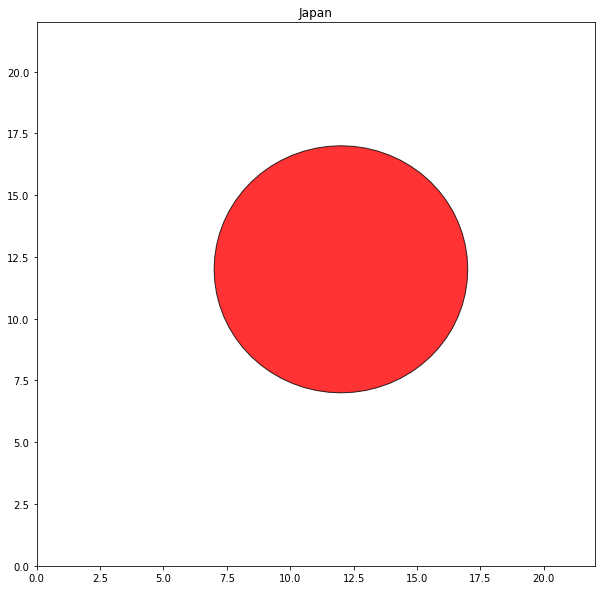

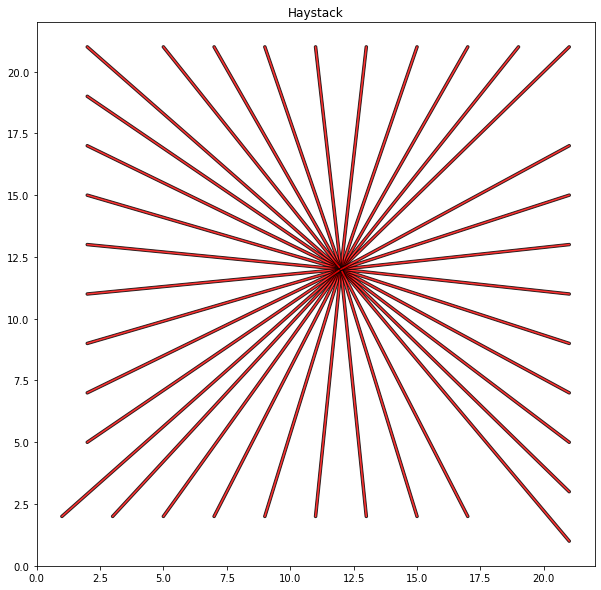

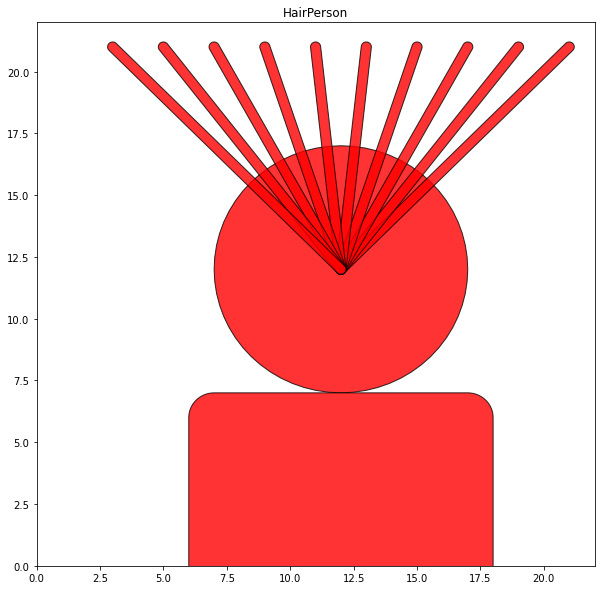

In [3]:
temp_list=IPTestSuite.benchList[5:]

config = {}
config['radius'] = 5.0
config['numNodes'] = 300

for benchmark in temp_list:
    try:
        print ("Planning: ", benchmark.name)
        collChecker = benchmark.collisionChecker
        gauss = GaussianPRM(collChecker)
        solution = gauss.planPath(benchmark.startList[0],benchmark.goalList[0], config)
        print(solution, len(solution))
        print(len(gauss.graph.nodes()))
        
    except Exception as e:
        solution = []
        print ("Failed", e)
    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(benchmark.name)
    basicPRMVisualize(gauss.graph, collChecker,solution,nodeSize=80,ax=ax)